In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import rdkit
from matplotlib import pyplot as plt


### The purpose of this notebook is to identify high-quality datasets for model-building.

See: https://docs.google.com/document/d/1Kr3_8PFoR7LZ8hLeNRMlJEzl6Snp-qMqmn2REk7--dM/edit?usp=sharing

Go/no-go: If acceptable models cannot be built from high-quality datasets from single contributiters, then producing broadly usable models is unlikely.

In [3]:
beta_METASPACE = pd.read_csv('Metaspace_beta_2020_Feb.tsv', sep='\t')

In [4]:
beta = beta_METASPACE.copy(deep=True)

In [5]:
beta = beta.replace('FT-ICR', 'FTICR')

In [6]:
cols = ['polarity', 'analyzer', 'group']
orbi_pos = ['positive', 'Orbitrap', ['♡EMBL♡', 'UTHSA', 'JLU Giesse', 'MPI Bremen']] 
orbi_neg = ['negative', 'Orbitrap', ['♡EMBL♡', 'UTHSA', 'U Copenhagen', 'JLU Giesse']]
ft_pos = ['positive', 'FTICR', ['PNNL', 'U Rennes 1', 'IBMP', 'U Melbourne']]
ft_neg = ['negative', 'FTICR', ['PNNL', 'U Melbourne','U Rennes 1', 'HMGU']]
options = [orbi_pos, orbi_neg, ft_pos, ft_neg]
opt_name = ['orbi_pos', 'orbi_neg', 'ft_pos', 'ft_neg']

Text(0, 0.5, 'num datasets')

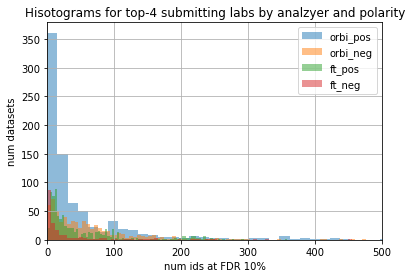

In [7]:
i = 0
fig, ax = plt.subplots()
while i < 4:
    x = options[i]
    beta[(beta[cols[0]] == x[0]) &
         (beta[cols[1]] == x[1]) &
         (beta[cols[2]].isin(x[2]))]['FDR@10%'].hist(bins=100, alpha=0.5, label=opt_name[i])
    i +=1
plt.title('Hisotograms for top-4 submitting labs by analzyer and polarity')
plt.legend(loc='upper right')
ax.set_xlim(0,500)
#ax.set_ylim(0,50)
ax.set_xlabel('num ids at FDR 10%')
ax.set_ylabel('num datasets')

Text(0, 0.5, 'num datasets')

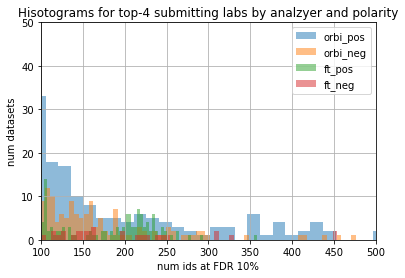

In [8]:
i = 0
fig, ax = plt.subplots()
while i < 4:
    x = options[i]
    beta[(beta[cols[0]] == x[0]) &
         (beta[cols[1]] == x[1]) &
         (beta[cols[2]].isin(x[2]))]['FDR@10%'].hist(bins=100, alpha=0.5, label=opt_name[i])
    i +=1
plt.title('Hisotograms for top-4 submitting labs by analzyer and polarity')
plt.legend(loc='upper right')
ax.set_xlim(100,500)
ax.set_ylim(0,50)
ax.set_xlabel('num ids at FDR 10%')
ax.set_ylabel('num datasets')

In [9]:
i = 0
out_dict = {}
out_ds_ids = {}
while i < 4:
    x = options[i]
    y = (beta[(beta[cols[0]] == x[0]) &
         (beta[cols[1]] == x[1]) &
         (beta[cols[2]].isin(x[2])) &
         (beta['FDR@10%'] >= 100)])
    out_dict[opt_name[i]] = y.shape[0]
    out_ds_ids[opt_name[i]] = list(y.datasetId)
    i+=1
out_dict

{'orbi_pos': 138, 'orbi_neg': 131, 'ft_pos': 132, 'ft_neg': 32}

In [22]:
# Check that all sources are MALDI!

In [19]:
source_dict = {}
source_dict['orbi_pos'] = list(beta[beta.datasetId.isin(out_ds_ids['orbi_pos'])].ionisationSource.unique())
source_dict['orbi_neg'] = list(beta[beta.datasetId.isin(out_ds_ids['orbi_neg'])].ionisationSource.unique())
source_dict['ft_pos'] = list(beta[beta.datasetId.isin(out_ds_ids['ft_pos'])].ionisationSource.unique())
source_dict['ft_neg'] = list(beta[beta.datasetId.isin(out_ds_ids['ft_neg'])].ionisationSource.unique())
source_dict
# All data is MALDI

{'orbi_pos': ['AP-SMALDI 10', 'AP-SMALDI5', 'MALDI', 'Maldi'],
 'orbi_neg': ['AP-SMALDI 10', 'MALDI'],
 'ft_pos': ['MALDI'],
 'ft_neg': ['MALDI']}

In [27]:
for ds in out_ds_ids['ft_pos']:
    print(ds)

2017-08-04_12h38m01s
2016-10-10_10h50m00s
2016-11-15_12h00m00s
2018-01-10_12h49m21s
2018-01-04_15h10m02s
2018-01-04_14h36m35s
2017-12-11_15h07m56s
2017-12-11_15h07m13s
2017-12-11_15h06m45s
2017-11-27_16h07m06s
2017-11-27_16h06m20s
2017-11-27_16h05m41s
2016-12-01_18h42m02s
2016-09-22_11h16m16s
2017-08-09_10h07m28s
2017-08-09_10h07m05s
2017-08-09_10h06m42s
2017-08-09_10h06m25s
2017-08-08_14h30m45s
2017-08-08_14h30m25s
2017-08-08_14h30m09s
2017-08-08_14h29m48s
2017-08-08_14h29m07s
2017-08-08_14h28m01s
2017-08-08_14h27m05s
2017-08-08_14h18m50s
2017-08-08_14h05m38s
2017-08-08_09h06m39s
2017-08-08_09h05m39s
2017-08-08_09h04m59s
2017-08-08_09h04m28s
2017-08-08_09h04m00s
2017-08-04_12h39m49s
2017-08-04_12h38m34s
2017-08-04_12h36m19s
2017-08-04_12h35m23s
2017-08-04_12h34m49s
2017-08-04_12h34m05s
2017-08-04_12h33m17s
2017-08-04_12h32m36s
2017-08-01_07h52m24s
2017-08-01_07h51m51s
2017-08-01_07h51m06s
2017-08-01_07h50m35s
2017-08-01_07h50m05s
2017-08-01_07h49m27s
2017-08-01_07h48m41s
2017-08-01_07

In [ ]:
# Saved to: '/Users/dis/PycharmProjects/neutral_loss/good_ds_2020_Feb_25.txt'